## Importing and understanding general overview of data

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("../data/train.csv")

In [77]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [79]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Data Cleaning

In [80]:
#Check for null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [81]:
# Null values are in only one column and a very little, so they can be dropped
df.shape
df.size
df.dropna(inplace=True)
df.shape #Confirming that rows have been succesfully dropped

(9789, 18)

In [82]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [83]:
#Checking for duplications in the data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9789, dtype: bool

In [84]:
# Checking column data types
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [85]:
#Setting dates to a consistent format
#Looping through column names to convert all columns that have the word "Date" in them to Datetime format
count = 0
for col_name in df.columns.tolist():
    if "Date" in col_name:
        count += 1
        df[col_name] = pd.to_datetime(df[col_name], format='mixed', dayfirst=True)
print(f"{count} Column were converted to datetime")

2 Column were converted to datetime


In [86]:
# Dropping columns that are irrelevant to analysis
df.drop("Row ID", axis=1, inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9789 non-null   object        
 1   Order Date     9789 non-null   datetime64[ns]
 2   Ship Date      9789 non-null   datetime64[ns]
 3   Ship Mode      9789 non-null   object        
 4   Customer ID    9789 non-null   object        
 5   Customer Name  9789 non-null   object        
 6   Segment        9789 non-null   object        
 7   Country        9789 non-null   object        
 8   City           9789 non-null   object        
 9   State          9789 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9789 non-null   object        
 12  Product ID     9789 non-null   object        
 13  Category       9789 non-null   object        
 14  Sub-Category   9789 non-null   object        
 15  Product Name   9789 non-nu

In [88]:
#Checking specific columns for mispelt words
print(df["Ship Mode"].value_counts())
print(df["Segment"].value_counts())
print(df["Country"].value_counts())
print(df["State"].value_counts())
print(df["City"].value_counts())
print(df["Region"].value_counts())
print(df["Category"].value_counts())
print(df["Sub-Category"].value_counts())

Ship Mode
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: count, dtype: int64
Segment
Consumer       5096
Corporate      2948
Home Office    1745
Name: count, dtype: int64
Country
United States    9789
Name: count, dtype: int64
State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Massachusetts            135
Indiana                  135
New Jersey               122
Oregon                   122
Wisconsin                105
Maryland                 105
Delaware                  93
Minnesota                 89
Connecticut         

In [89]:
# Round up Sales data to 2-decimal places
df['Sales'] = df['Sales'].round(2)

In [90]:
# Sort the data in ascending order using the Order Date
df_sorted = df.sort_values(by= "Order Date") 

In [91]:
df_sorted.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45
741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54
740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74
739,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.78
1759,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54


# Using the data to answer questions

# Questions:
 1. What were products with the most and least sales over the four year period?
 2. What were categories and sub-categories with the most and least sales over the four year period?
 3. What are the total yearly sales over the four year period?
 4. Who are the top 5 Customers?

# Question 1:

In [109]:
products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False)
print(products.head()) # Top 5 products with the MOST sales 
print(products.tail()) # Top 5 products with the LEAST sales

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.83
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.38
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.48
HON 5400 Series Task Chairs for Big and Tall                                   21870.57
GBC DocuBind TL300 Electric Binding System                                     19823.47
Name: Sales, dtype: float64
Product Name
Acme Serrated Blade Letter Opener                                   7.63
Grip Seal Envelopes                                                 7.07
Xerox 20                                                            6.48
Avery 5                                                             5.76
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.62
Name: Sales, dtype: float64


Insights: The Canon imageCLASS 2200 Advanced Copier generated the most revenue, while the Eureka Disposable Bag generated the least. This shows that high-value office machinery is a much stronger sales driver than low-cost vacuum accessories.

# Question 2:

In [119]:
categories = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print(categories.head()) # Top & bottom categories with the MOST sales 

sub_categories = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
print(f"Top 5: \n{sub_categories.head()}") # Top 5 Sub-categories
print(f"Bottom 5: \n{sub_categories.tail()}") # Bottom 5 Sub-categories

Category
Technology         825856.10
Furniture          723538.40
Office Supplies    703212.68
Name: Sales, dtype: float64
Top 5: 
Sub-Category
Phones     326487.74
Chairs     322107.52
Storage    217779.08
Tables     202810.62
Binders    200028.73
Name: Sales, dtype: float64
Bottom 5: 
Sub-Category
Supplies     46420.29
Art          26697.38
Envelopes    16125.98
Labels       12347.71
Fasteners     3001.93
Name: Sales, dtype: float64


Insights: The Technology category is the business's most significant growth engine, with Phones emerging as the top-selling sub-category. This confirms that the company’s market strength is currently centered on high-value electronics and communication devices.

# Question 3:

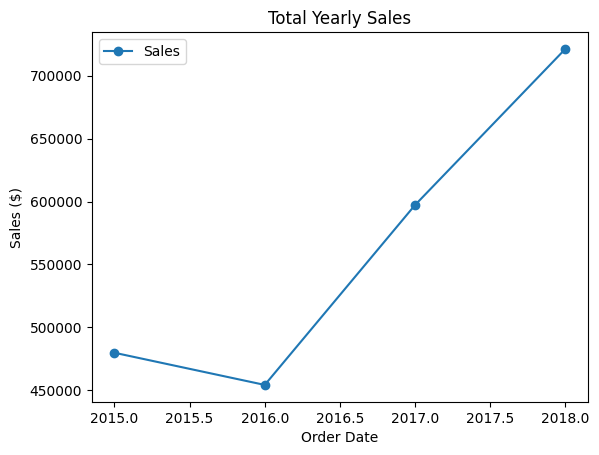

In [144]:
df.groupby(df["Order Date"].dt.year)["Sales"].sum().plot(kind= "line", style='o-', legend=True)
plt.title("Total Yearly Sales")
plt.ylabel("Sales ($)")
plt.show()

In [133]:
yearly_sales = df.groupby(df["Order Date"].dt.year)["Sales"].sum()
print(f"Total Sales across four years: {df['Sales'].sum()}")
print(f"Total yearly sales: \n{yearly_sales}")

Total Sales across four years: 2252607.1799999997
Total yearly sales: 
Order Date
2015    479856.18
2016    454315.77
2017    597225.62
2018    721209.61
Name: Sales, dtype: float64


Insights: Total sales over four years reached $2,252,607, with a noticeable growth trend starting after 2016. Yearly revenue peaked in 2018 at $721,209, showing a strong and consistent recovery in sales performance.

# Question 4:

In [135]:
products = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)
print(products.head()) # Top 5 Customers 

Customer Name
Sean Miller      25043.07
Tamara Chand     19052.22
Raymond Buch     15117.35
Tom Ashbrook     14595.62
Adrian Barton    14473.56
Name: Sales, dtype: float64


Insights: Sean Miller is the highest-contributing customer in terms of total sales volume. Identifying such key individual accounts is vital for developing targeted loyalty programs and ensuring long-term revenue stability.